In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline
#jtplot.style()

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data_drop_SalePrice = data.drop('SalePrice',axis=1)
data_drop_SalePrice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
y = data['SalePrice'] 
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [8]:
X = data_drop_SalePrice.drop('Id', axis=1)

In [9]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
Total = X.isnull().sum().sort_values(ascending=False)
percent = (X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)
percent[:10]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
dtype: float64

In [11]:
to_drop=percent.index[:6].tolist()

X.drop(labels=to_drop,axis = 1,inplace=True)

In [12]:
X.shape

(1460, 73)

In [13]:
categorial_variables = list(X.select_dtypes(exclude=['int64', 'float64', 'bool']).columns.values)
X[categorial_variables] = X[categorial_variables].apply(lambda x: x.fillna("None"),axis=0)
X = pd.get_dummies(X)

In [14]:
numeric_variables = list(X.select_dtypes(include=['int64', 'float64']).columns.values)
X[numeric_variables] = X[numeric_variables].apply(lambda x: x.fillna(x.median()),axis=0)

In [15]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [16]:
from sklearn.preprocessing import StandardScaler
features=X[numeric_variables]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[numeric_variables] = features

In [17]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,0,0,0,1,0,0,0,0,1,0


In [18]:
X.shape

(1460, 279)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [20]:
num_folds = 10
seed = 7

In [21]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [22]:
clf_rf = RandomForestRegressor()
results = cross_val_score(clf_rf, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 84.576% (5.281%)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Уменьшим размер данных для ускорения обучения, возьмем случайную подвыборку 30% данных
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [25]:
clf_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
clf_y_predt = clf_rf.predict(X_valid)

In [27]:
metrics.r2_score(y_valid, clf_y_predt)

0.8763961319398638

In [28]:
print("Правильность на обучающем наборе: {:.3f}".format(clf_rf.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(clf_rf.score(X_valid, y_valid)))

Правильность на обучающем наборе: 0.964
Правильность на тестовом наборе: 0.876


In [ ]:
#Важность признаков

In [29]:
imp = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
imp = imp.sort_values(ascending=False)

Text(0,0.5,'Признак')

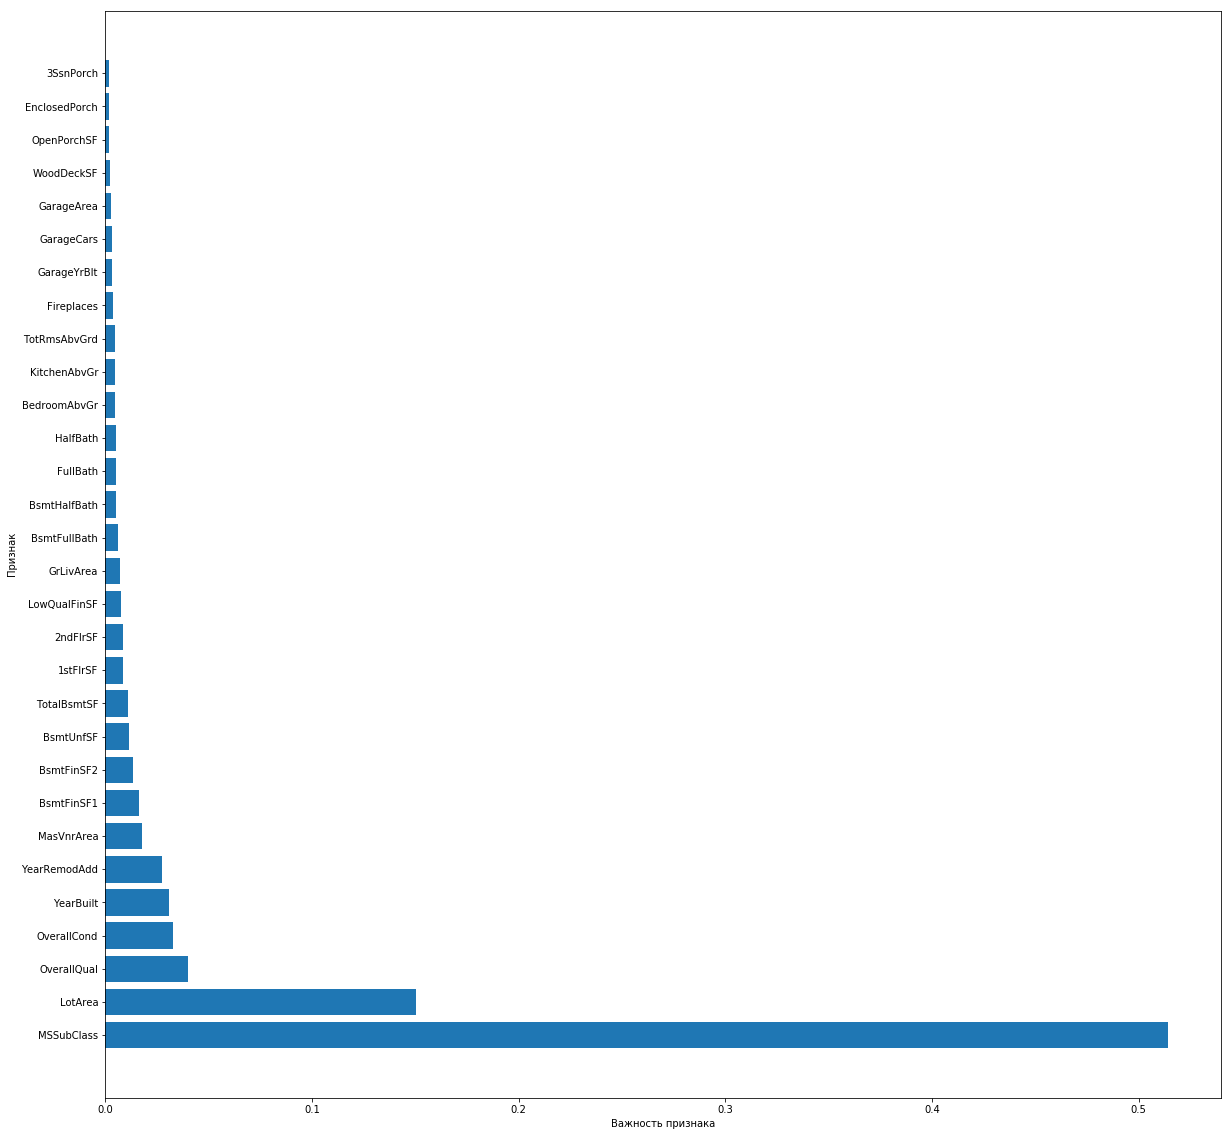

In [30]:
#Изобразим на графике
plt.rcParams["figure.figsize"] = (20,20)
n_features =len(imp[:30])

plt.barh(range(n_features), imp[:30], align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Важность признака")
plt.ylabel("Признак")

In [ ]:
#Блендинг

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [32]:
X_train_st, X_test, y_train_st, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=7)

In [33]:
lin_regr=LinearRegression()
rg = Ridge(alpha=1.1)
las = Lasso()
rfr = RandomForestRegressor()
metamodel = Ridge()

In [34]:
def model_fit_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    r2_sc = metrics.r2_score(y_test, prediction)
    return prediction, r2_sc

In [35]:
list_of_models = [lin_regr, rg, las, rfr]

In [36]:
pred = []
r2_sc = []
for mod in list_of_models:
    a,b = model_fit_predict(mod, X_train_st, y_train_st, X_test, y_test)
    pred.append(a)
    r2_sc.append(b)

In [37]:
r2_sc

[-8.548095420849915e+19,
 0.898090383130568,
 0.8989301702992568,
 0.8814920337371351]

In [38]:
X_pred = pd.DataFrame(np.array(pred).T)

In [39]:
metamodel.fit(X_pred, y_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
pred = []
r2_sc = []
for mod in list_of_models:
    a,b = model_fit_predict(mod, X_train, y_train, X_valid, y_valid)
    pred.append(a)
    r2_sc.append(b)

In [41]:
y_pred = metamodel.predict(X_pred)

In [42]:
metrics.r2_score(y_test, y_pred)

0.9306017896831363

In [ ]:
# Cтекинг

In [43]:
def get_meta_features(model, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        model.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = model.predict(X_train.iloc[test_ind])
        meta_test += model.predict(X_test)
        
    r2_sc1 = metrics.r2_score(y_test, meta_test / stack_cv.n_splits)
    
    return meta_train, meta_test / stack_cv.n_splits, r2_sc1

In [44]:

from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

In [45]:
stack_cv.split(X_train, y_train)

<generator object _BaseKFold.split at 0x0000015198C86830>

In [46]:
meta_train = []
meta_test = []
col_names = []
r2_sc_stack = []

In [47]:
for mod in list_of_models:
    meta_tr, meta_te, r2_score = get_meta_features(mod, X_train, y_train, X_test, stack_cv)
    meta_train.append(meta_tr)
    meta_test.append(meta_te)
    r2_sc_stack.append(r2_score)
    col_names.append(str(mod)+'_pred')

In [48]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

In [49]:
r2_sc_stack

[-1.9849314154011775e+19,
 0.9485395026819812,
 0.9523871880084508,
 0.9808829437314588]

In [50]:
X_meta_train.shape

(1022, 4)

In [51]:
X_meta_test.shape

(205, 4)

In [52]:
metamodel.fit(X_meta_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
y_pred_meta_valid = metamodel.predict(X_meta_test)

In [54]:
metrics.r2_score(y_test, y_pred_meta_valid)

0.962255864131872